In [1]:
%matplotlib inline
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = [16, 12]

# Load and clear data

In [3]:
# df = pd.read_csv("Boston.csv")
df = pd.read_csv("kaggle/train.csv")
df.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [4]:
# df = df.drop("Unnamed: 0", axis=1)
df = df.set_index('ID')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [5]:
# Check if there are null values (e.g. NaN)
df.isnull().values.any()

False

# Exploratory data analysis

Perform Exploratory data analysis (EDA) in order to understand the structure of the data. Numerical EDA gives you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Visual EDA on the other hand will give you insight into features and target relationship and distribution.

## Numerical EDA

In [6]:
# Check how big is dataset, how many and of what type features it has, what is target etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 1 to 506
Data columns (total 14 columns):
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(3)
memory usage: 39.0 KB


Variables description:
```
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's
```

In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


## Visual EDA

### Crime level in relation to citizen status and median value of houses

In [8]:
df['medv_bins'] = pd.cut(df.medv, bins=5, include_lowest=True)
df.medv_bins.head()

ID
1    (23.0, 32.0]
2    (14.0, 23.0]
4    (32.0, 41.0]
5    (32.0, 41.0]
7    (14.0, 23.0]
Name: medv_bins, dtype: category
Categories (5, interval[float64]): [(4.954, 14.0] < (14.0, 23.0] < (23.0, 32.0] < (32.0, 41.0] < (41.0, 50.0]]

In [9]:
df['lstat_bins'] = pd.cut(df.lstat, bins=[0, 7, 17, 38], labels=['richest', 'ordinary', 'poorest'], include_lowest=True)
df.lstat_bins.head()

ID
1     richest
2    ordinary
4     richest
5     richest
7    ordinary
Name: lstat_bins, dtype: category
Categories (3, object): [richest < ordinary < poorest]

[Text(0.5,0,'')]

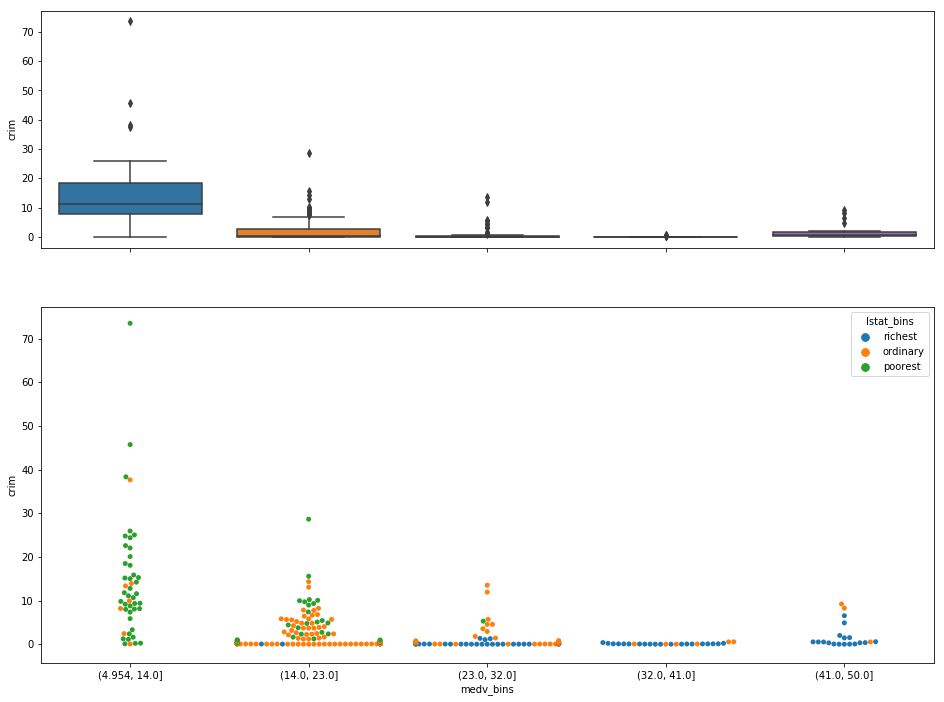

In [10]:
f, (ax_viol, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.4, .6)})

sns.boxplot(x='medv_bins', y='crim', data=df, ax=ax_viol)
sns.swarmplot(x='medv_bins', y='crim', hue='lstat_bins', data=df, ax=ax_box)

ax_viol.set(xlabel='')

[Text(0.5,0,'')]

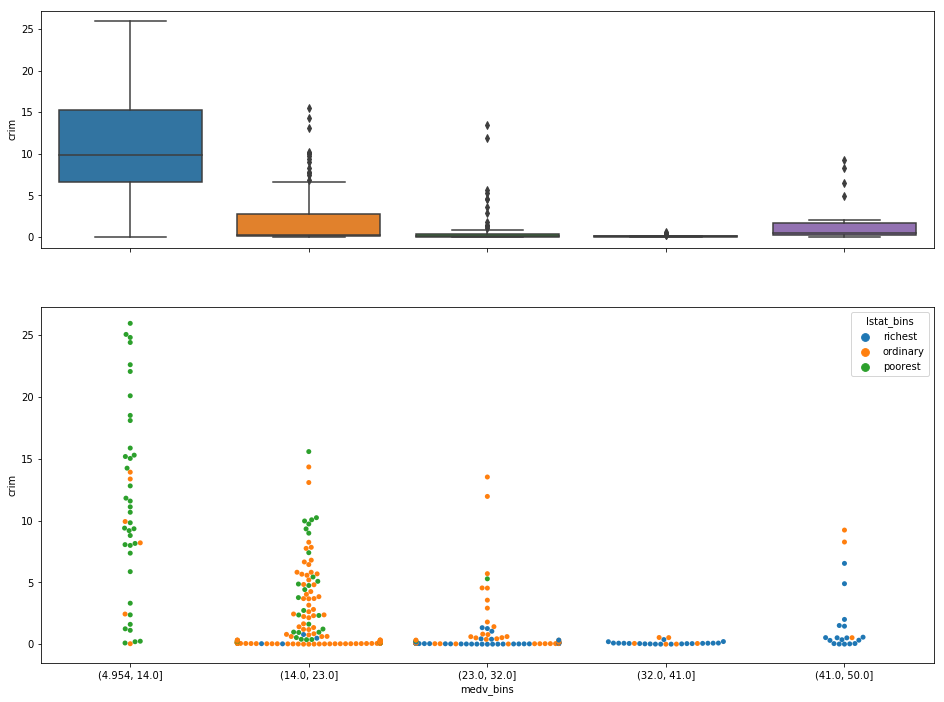

In [11]:
f, (ax_viol, ax_box) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.4, .6)})

sns.boxplot(x='medv_bins', y='crim', data=df[df.crim < 27], ax=ax_viol)
sns.swarmplot(x='medv_bins', y='crim', hue='lstat_bins', data=df[df.crim < 27], ax=ax_box)

ax_viol.set(xlabel='')

### Find feature with strongest correlation to median house values

In [12]:
corr = df.corr()['medv'].abs().sort_values(ascending=False)
corr[1:6]

lstat      0.738600
rm         0.689598
ptratio    0.481376
indus      0.473932
tax        0.448078
Name: medv, dtype: float64

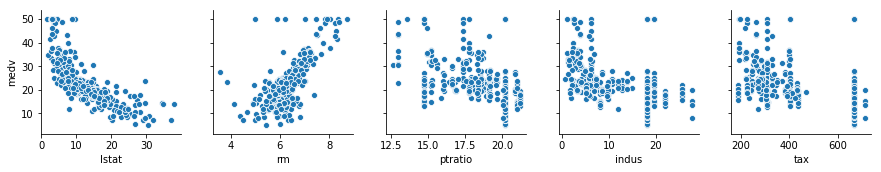

In [13]:
sns.pairplot(data=df, x_vars=corr.index[1:6], y_vars='medv')

LSTAT (% lower status of the population) has highest correlation with MEDV (Median value of owner-occupied homes in $1000's, our target), but as we can see relationship isn't linear. On the other hand RM (average number of rooms per dwelling) begs to fit a line to it!

# Simple linear regression

## Prepare dataset

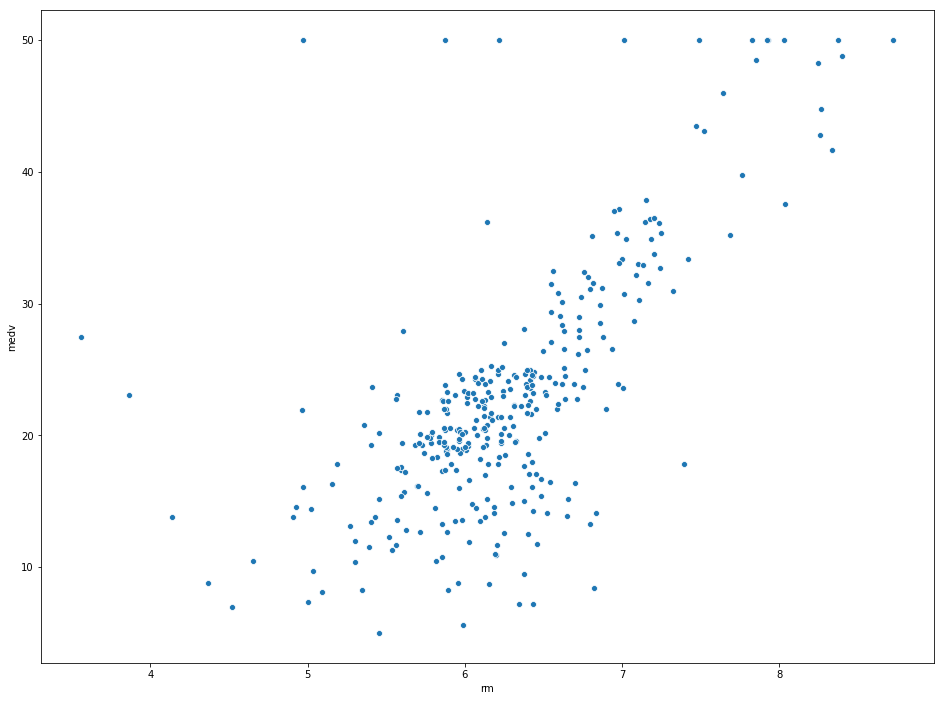

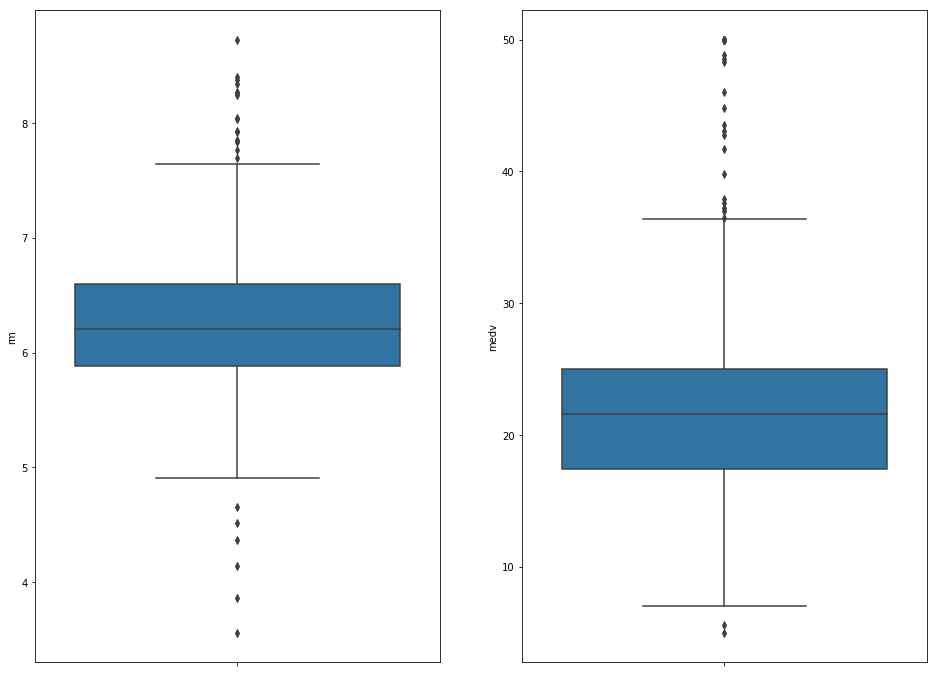

In [14]:
sns.scatterplot(x='rm', y='medv', data=df)
f, (ax_rm, ax_medv) = plt.subplots(ncols=2)
sns.boxplot(y='rm', data=df, ax=ax_rm)
sns.boxplot(y='medv', data=df, ax=ax_medv)

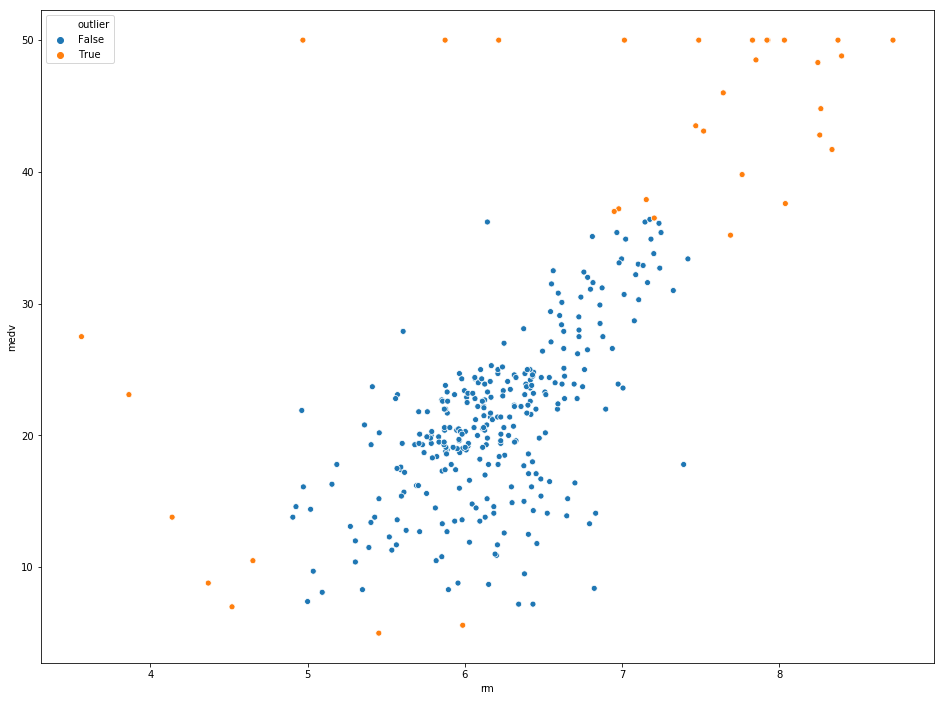

In [15]:
# Remove outliers...
# ...from medv
medv_Q1 = df.medv.quantile(0.25)
medv_Q3 = df.medv.quantile(0.75)
medv_IQR = medv_Q3 - medv_Q1
medv_outliers = (df.medv < (medv_Q1 - 1.5 * medv_IQR)) | (df.medv > (medv_Q3 + 1.5 * medv_IQR))

# ...from rm
rm_Q1 = df.rm.quantile(0.25)
rm_Q3 = df.rm.quantile(0.75)
rm_IQR = rm_Q3 - rm_Q1
rm_outliers = (df.rm < (rm_Q1 - 1.5 * rm_IQR)) | (df.rm > (rm_Q3 + 1.5 * rm_IQR))

df['outlier'] = medv_outliers | rm_outliers
sns.scatterplot(x='rm', y='medv', hue='outlier', data=df)

df_nooutliers = df[df.outlier == False]

In [16]:
# Two dims: number of rooms feature and bias
x = df_nooutliers.rm.values
y = df_nooutliers.medv.values

X = np.ones((df_nooutliers.shape[0], 2))
X[:, 0] = x # Merge biases with features

N = len(x)
print('Number of examples (N): ', N)

Number of examples (N):  298


## Calculate coefficients

In [17]:
# Where it comes from?! See in ISL book, chapter 3!
B = inv(X.T @ X) @ X.T @ y
print("    Slope: ", B[0])
print("Intercept: ", B[1])

    Slope:  7.840099771725263
Intercept:  -27.546366151219296


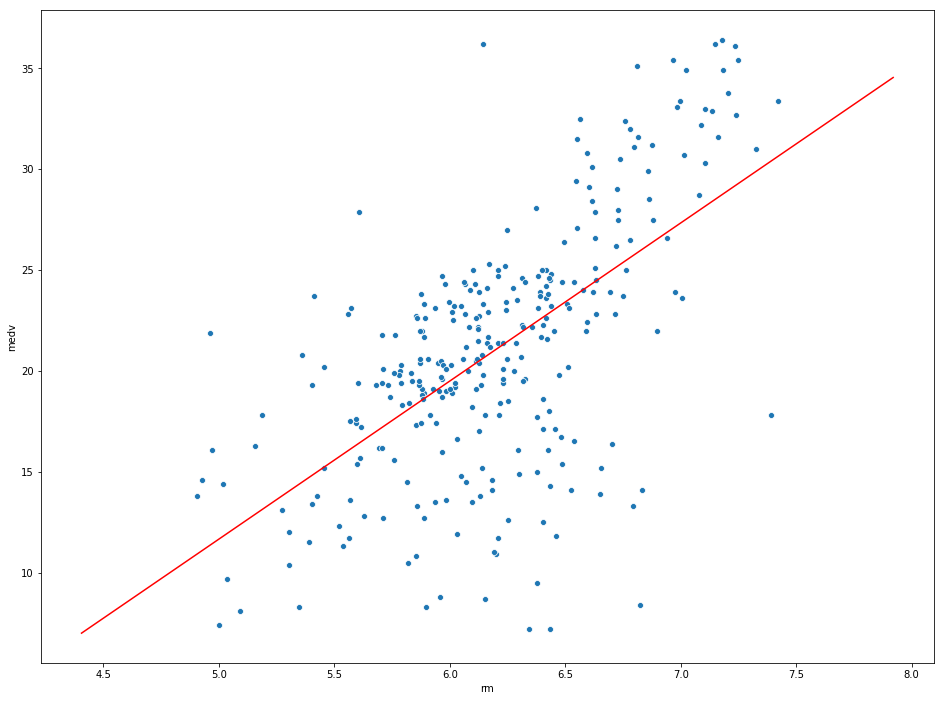

In [18]:
# Scatter data points
ax = sns.scatterplot(x='rm', y='medv', data=df_nooutliers)

# Plot regression line
X_ = np.array([
    [df_nooutliers.rm.min() - .5, 1],
    [df_nooutliers.rm.max() + .5, 1]
])
y_ = X_ @ B
ax.plot(X_[:, 0], y_, color='r')

## Calculate standard error

In [19]:
y_ = X @ B                          # Predictions
e = y - y_                          # Residuals
rss = e @ e.T                       # Residual sum of squares
rse = np.sqrt(rss/(N-2))            # Residual standard error
se = rse * np.sqrt(inv(X.T @ X))    # Standard error
se = np.array([se[0, 0], se[1, 1]])

print("    Slope std. error: ", se[0])
print("Intercept std. error: ", se[1])

    Slope std. error:  0.5762875330075893
Intercept std. error:  3.5805574745610516


/usr/local/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


## Calculate confidence intervals of coefficients

In [20]:
# How to understand this? See: https://stattrek.com/estimation/confidence-interval.aspx#sixsteps
conf_level = 0.95
alpha = 1 - conf_level
prob = 1 - alpha/2
critical_value = stats.t.ppf(prob, N - 2) # N - 2 degrees of freedom
margin_of_error = critical_value * se
conf_interval = B - margin_of_error, B + margin_of_error

print("Confidence interval lower bound: ", conf_interval[0])
print("Confidence interval upper bound: ", conf_interval[1])

Confidence interval lower bound:  [  6.70595972 -34.59294167]
Confidence interval upper bound:  [  8.97423982 -20.49979063]


## Hypothesis test
Null hypothesis: slope is equal zero, there is no relationship between number of rooms and house value.

In [21]:
t = B[0] / se[0]
p = 1 - stats.t.cdf(t, N - 2)
print("p-value: ", p, " Statistical significance:", p < 0.05)

p-value:  0.0  Statistical significance: True


### In scipy...

In [22]:
print(stats.linregress(X[:, 0], y))
print("    Slope conf. interval", stats.t.interval(conf_level, N-2, loc=B[0], scale=se[0]))
print("Intercept conf. interval", stats.t.interval(conf_level, N-2, loc=B[1], scale=se[1]))

LinregressResult(slope=7.840099771725253, intercept=-27.546366151218976, rvalue=0.620258473592534, pvalue=4.505763345422425e-33, stderr=0.5762875330075863)
    Slope conf. interval (6.705959724613042, 8.974239818837484)
Intercept conf. interval (-34.592941671764535, -20.499790630674056)


## Calculate confidence intervals of predictions

$S_{xx}$ - the sum of the squares of the difference between each x and the mean value of x.

In [23]:
x_mean = np.mean(x)

sxx = (x - x_mean) @ (x - x_mean).T
se_x = rse * np.sqrt(1/N + (x - x_mean)**2/sxx)

margin_of_error_x = critical_value * se_x
upper_confidence_band = y_ + margin_of_error_x
lower_confidence_band = y_ - margin_of_error_x

### Plot regression line with confidence bands

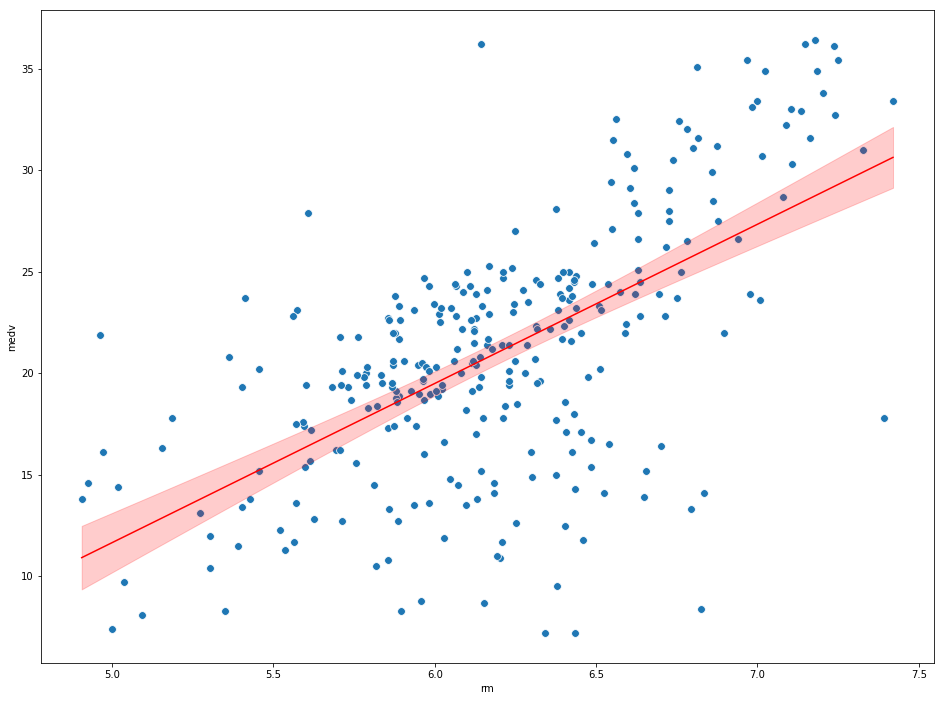

In [24]:
# Scatter data points
ax = sns.scatterplot(x='rm', y='medv', data=df_nooutliers, s=60)

# Plot regression line
ax.plot(np.sort(x), np.sort(y_), color='r')

# Draw confidence bands
ax.fill_between(np.sort(x), np.sort(upper_confidence_band), np.sort(lower_confidence_band), color='r', alpha=0.2)

### In seaborn...

/usr/local/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


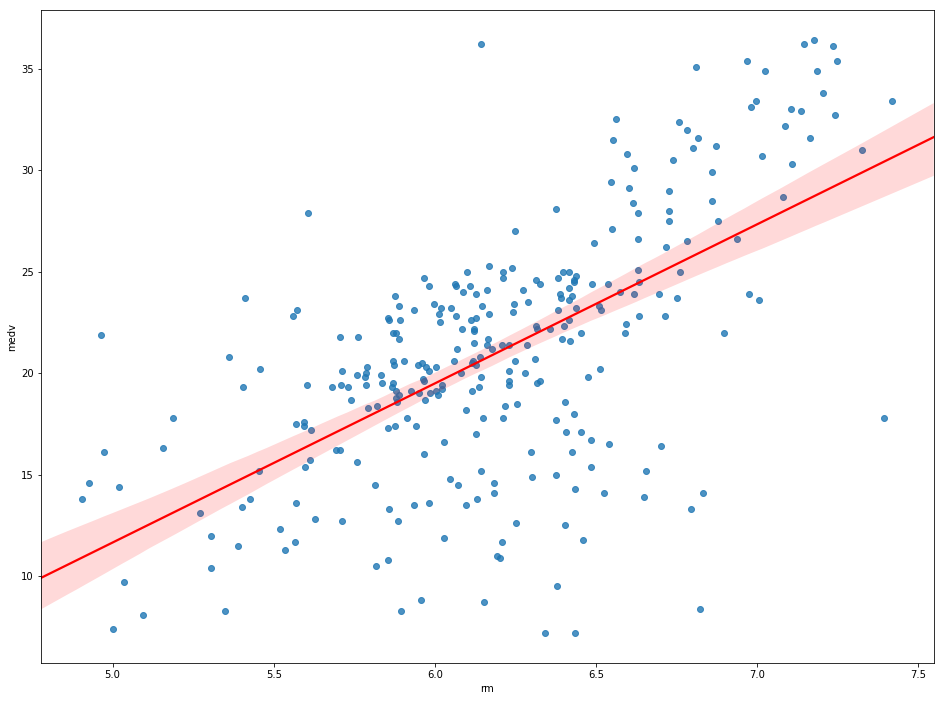

In [25]:
sns.regplot(x='rm', y='medv', data=df_nooutliers, line_kws={"color": 'r'})

# Kaggle submission

In [26]:
# Load data frame
df_test = pd.read_csv("kaggle/test.csv")
df_test = df_test.set_index('ID')

# Create features matrix
X_test = np.ones((df_test.shape[0], 2))
X_test[:, 0] = df_test['rm'].values # Merge biases with features

# Evaluate model!
df_test['medv'] = X_test @ B
df_test.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,28.784751
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,22.865475
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,20.842730
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.601236
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,19.525593


In [27]:
# Save submission
df_test.to_csv('simple_lin_reg.csv', columns=['medv'])

# What next?
If you want to learn more about mathematics for machine learning I encourage you to study [Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/) book and take part in "Math for ML" Gradient group! Join Gradient's Discord and write there on math-for-ml channel that you're interested in learning math together, we will set a meeting date to talk about organization of this group :)